In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import colors

In [4]:
data=pd.read_csv(r"C:\Users\Hp\Downloads\archive (5)\HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.shape

(14999, 10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


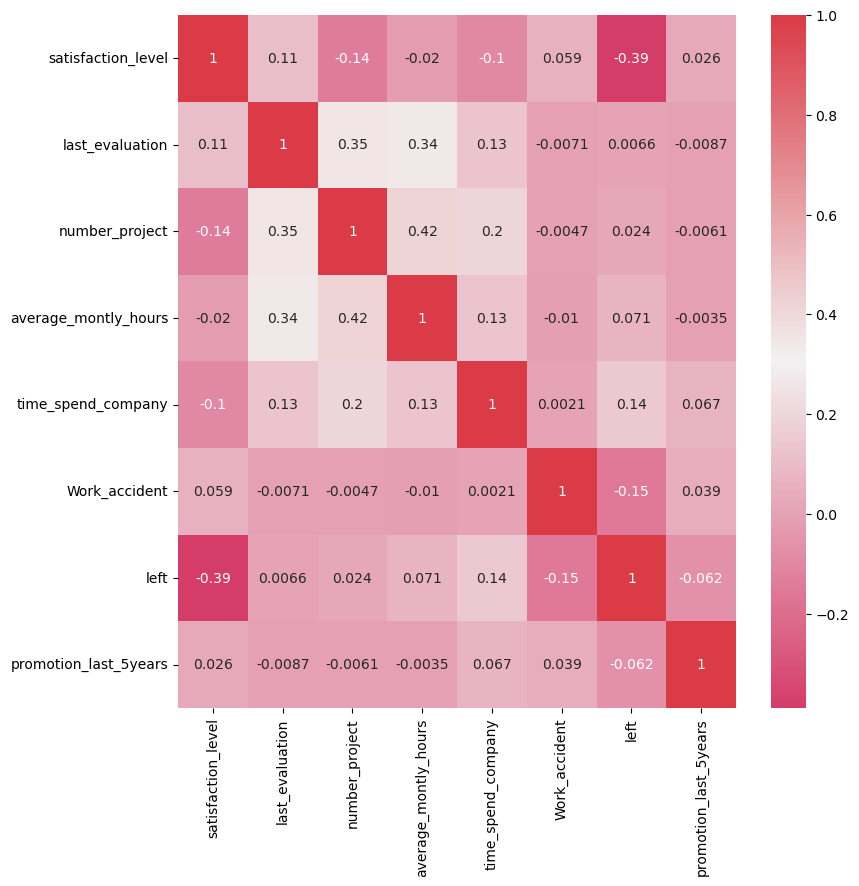

In [8]:
#To find the correlation between the variables
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(000,10,as_cmap=True),annot=True)
data.corr()

In [10]:
#Average no of all columns
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#conclusions:
**Satisfaction Level**: If Satisfaction level seems to be relatively low (0.44) there is chance of employees leaving the firm vs the retained ones have high satisfaction level(0.66)
**Average Monthly Hours**: If Average monthly hours are higher in employees them leaving the firm increases(199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

<AxesSubplot:title={'center':'Leaving the firm based on Satisfaction'}, xlabel='left', ylabel='satisfaction_level'>

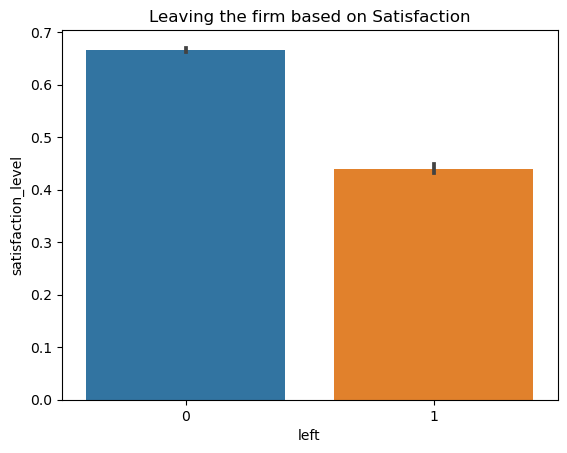

In [16]:
#Barplot to represnt the conclusion 1 from above

import seaborn as sns
plt.title('Leaving the firm based on Satisfaction')
sns.barplot(x=data['left'], y=data['satisfaction_level'])

### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

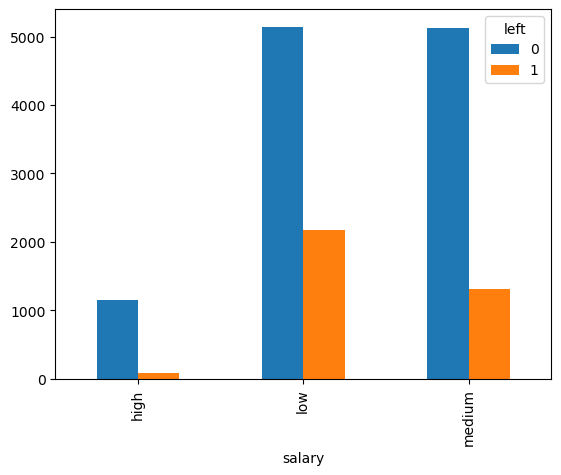

In [14]:
pd.crosstab(data.salary,data.left).plot(kind='bar')


### Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

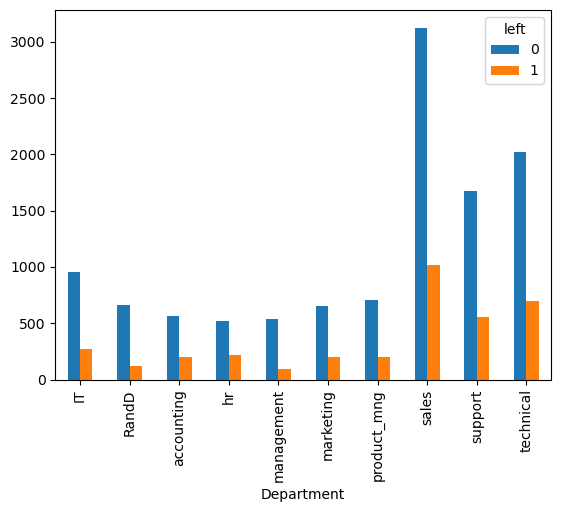

In [18]:
pd.crosstab(data.Department,data.left).plot(kind='bar')


There is some impact of Department on Retention of Employees but not major 

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**

In [20]:
subdata = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdata.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Now Salary has all text data. It needs to be converted to numbers and we will use dummy variable 

In [22]:
salary_dummies = pd.get_dummies(subdata.salary, prefix="salary")

In [24]:
data_with_dummies = pd.concat([subdata,salary_dummies],axis='columns')

In [26]:
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [28]:
data_with_dummies.drop('salary',axis='columns',inplace=True)
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [30]:
X = data_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [32]:
y = data.left

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [35]:
model.fit(X_train, y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
#ACCURACY OF THE MODEL
model.score(X_test,y_test)

0.776952380952381